# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [60]:
df = pd.read_csv('./data/ForeignGifts_edu.csv')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


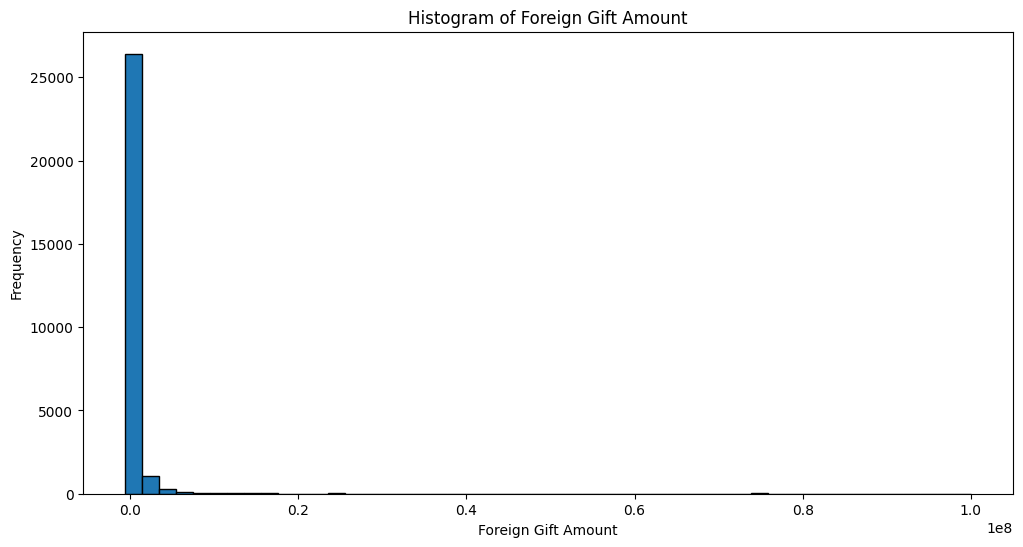

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [61]:
import matplotlib.pyplot as plt

# Create a histogram for Foreign Gift Amount
plt.figure(figsize=(12, 6))
plt.hist(df['Foreign Gift Amount'], bins=50, edgecolor='black')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

# Describe the Foreign Gift Amount variable
description = df['Foreign Gift Amount'].describe()
print(description)


The Histogram of Foreign Gift Amount is skewed right. The majority of foreign gifts are concentrated near the end of the scale. 

In [62]:
gift_type_counts = df['Gift Type'].value_counts()

gift_type_proportions = gift_type_counts / gift_type_counts.sum()

print("Value Counts Table for Gift Type:")
print(gift_type_counts)
print("\nProportion of Each Gift Type:")
print(gift_type_proportions)

Value Counts Table for Gift Type:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Proportion of Each Gift Type:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


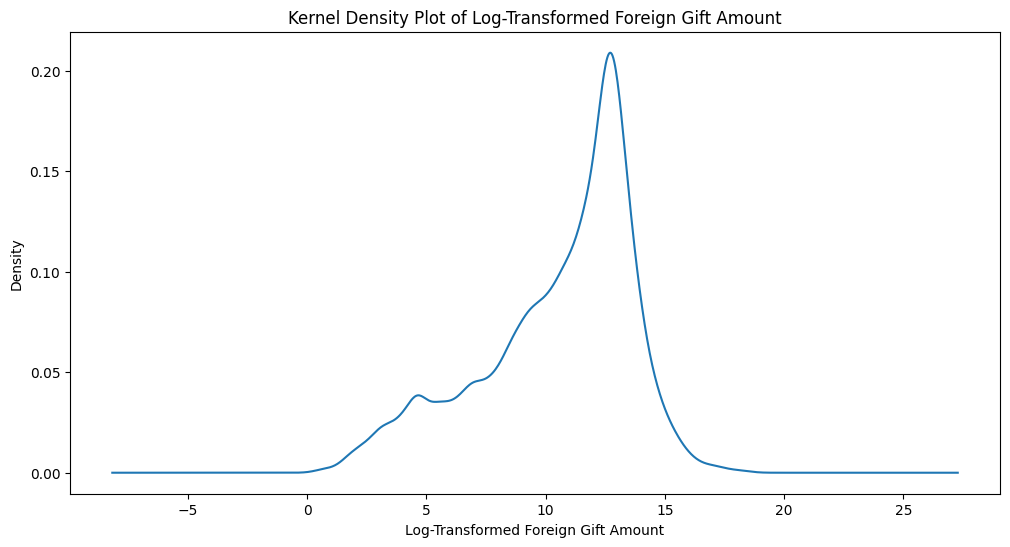

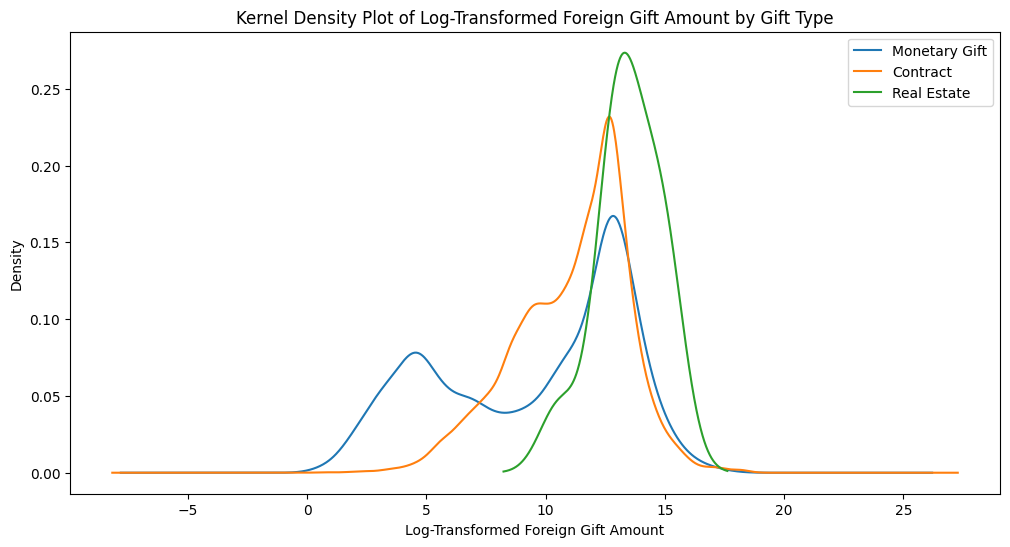

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Replace negative values with NaN
df['Foreign Gift Amount'] = df['Foreign Gift Amount'].replace({-np.inf: np.nan, np.inf: np.nan})
df['Foreign Gift Amount'] = df['Foreign Gift Amount'].apply(lambda x: np.nan if x < 0 else x)

df = df.dropna(subset=['Foreign Gift Amount'])

df['log_Foreign_Gift_Amount'] = np.log(df['Foreign Gift Amount'] + 1)  

# Create a kernel density plot for the log of Foreign Gift Amount
plt.figure(figsize=(12, 6))
df['log_Foreign_Gift_Amount'].plot(kind='kde')
plt.title('Kernel Density Plot of Log-Transformed Foreign Gift Amount')
plt.xlabel('Log-Transformed Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

# Create a kernel density plot for the log of Foreign Gift Amount conditional on gift type
plt.figure(figsize=(12, 6))
for gift_type in df['Gift Type'].unique():
    subset = df[df['Gift Type'] == gift_type]
    subset['log_Foreign_Gift_Amount'].plot(kind='kde', label=gift_type)

plt.title('Kernel Density Plot of Log-Transformed Foreign Gift Amount by Gift Type')
plt.xlabel('Log-Transformed Foreign Gift Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

The overall log-transformed gift amount shows a right skew distribution which confirms that most foreign gifts are small in value, while a few large donation drive the upper end. This is confirmed in the Kernel Density plot by Gift Type which shows that Real Estate Gifts are the largest and the overlap on Contract and Monetary gifts. 

In [64]:
top_15_countries_by_gifts = df['Country of Giftor'].value_counts().head(15)
print("Top 15 countries by number of gifts:")
print(top_15_countries_by_gifts)

top_15_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by amount given:")
print(top_15_countries_by_amount)

Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3654
CHINA              2461
CANADA             2344
JAPAN              1891
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1433
GERMANY            1393
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 countries by amount given:
Country of Giftor
QATAR                   2.706241e+09
ENGLAND                 1.464934e+09
CHINA                   1.237952e+09
SAUDI ARABIA            1.065206e+09
BERMUDA                 8.995940e+08
CANADA                  8.981607e+08
HONG KONG               8.874025e+08
JAPAN                   6.563255e+08
SWITZERLAND             6.198994e+08
INDIA                   5.395565e+08
GERMANY                 4.424844e+08
UNITED ARAB EMIRATES    4.313964e+08
FRANCE                  4.059258e+08
SINGAPORE               4

Top 15 institutions by amount received:
Institution Name
Carnegie Mellon University                       1.477923e+09
Cornell University                               1.289938e+09
Harvard University                               9.548036e+08
Massachusetts Institute of Technology            8.590717e+08
Yale University                                  6.134413e+08
Texas A&M University                             5.214550e+08
Johns Hopkins University                         5.024096e+08
Northwestern University                          4.023162e+08
Georgetown University                            3.799505e+08
University of Chicago (The)                      3.645443e+08
University of Colorado Boulder                   3.601732e+08
Duke University                                  3.436995e+08
Brigham Young University                         3.235099e+08
Stanford University                              3.195614e+08
University of Texas MD Anderson Cancer Center    3.015274e+08
Name: Foreign

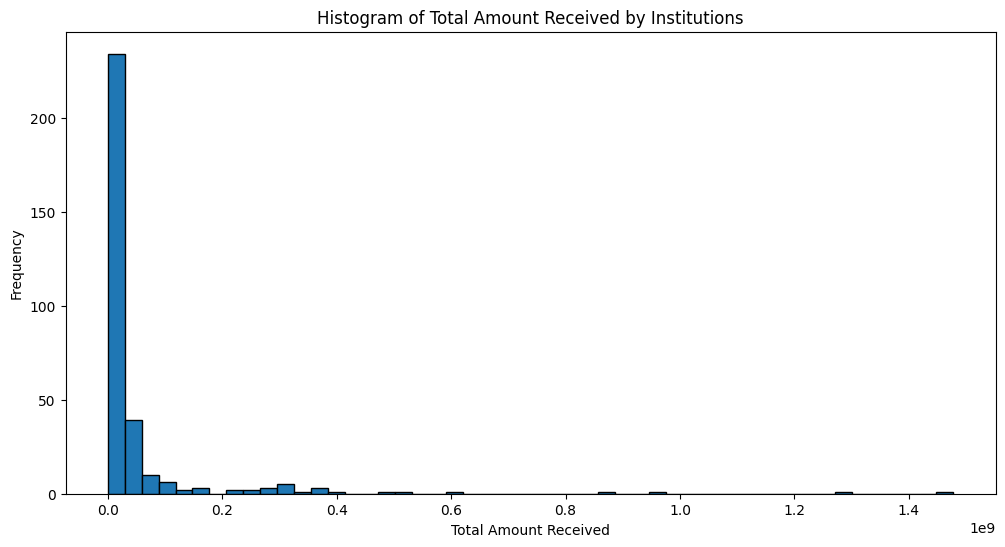

In [65]:
top_15_institutions_by_amount = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 institutions by amount received:")
print(top_15_institutions_by_amount)

# Create a histogram of the total amount received by all institutions
total_amount_by_institution = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(12, 6))
plt.hist(total_amount_by_institution, bins=50, edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Group by Giftor Name and sum the Foreign Gift Amount
top_giftors_by_amount = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

print("Top giftors by total amount given:")
print(top_giftors_by_amount)

Top giftors by total amount given:
Giftor Name
Qatar Foundation                       1.166504e+09
Qatar Foundation/Qatar National Res    7.961970e+08
Qatar Foundation for Education         3.739452e+08
Anonymous                              3.387936e+08
Saudi Arabian Cultural Mission         2.752215e+08
HCL                                    1.900000e+08
Church of Jesus Christ of LDS          1.852037e+08
Emirates Institute for Advanced Sc     1.706412e+08
QIC                                    1.483555e+08
Anonymous #9                           9.633500e+07
Qatar National Research Fund           7.902170e+07
Government of Saudi Arabia             7.519243e+07
Contracting Party                      6.999698e+07
CMKL University                        6.770000e+07
Royal Embassy of Saudi Arabia          6.706249e+07
Name: Foreign Gift Amount, dtype: float64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('./data/drilling_rigs.csv')
df.head()


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [37]:
observations = df.shape[0]
variables = df.shape[1]
print(df.dtypes)
print(observations)
print(variables)

Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                             object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                           object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)             object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)            object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)               object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                              int64
Active Wel

There are  623  observations in the dataset. 
There are  12  variables in the dataset. 
We will need to clean the data before we can analyze it. Some of the variables are not formatted to numerical values because of the Not Available values. I should replace them with NaN values and convert to numeric

In [ ]:
#Q2 
df['Month'] 
df['time'] = pd.to_datetime(df['Month'], format='%Y %B')
print(df.dtypes)

Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                             object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                           object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)             object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)            object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)               object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                              int64
Active Wel

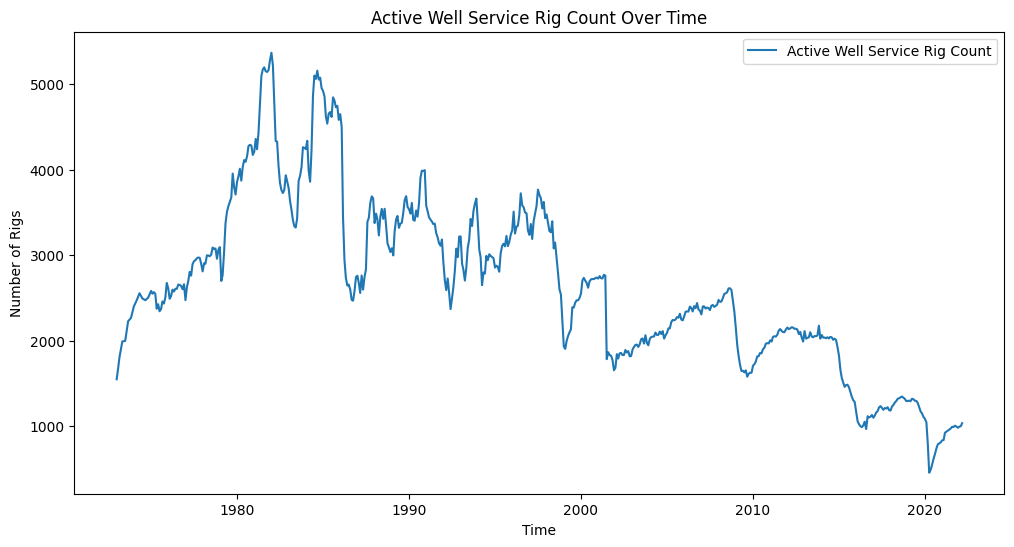

In [30]:
# Convert 'Active Well Service Rig Count (Number of Rigs)' to numeric, forcing errors to NaN
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'], label='Active Well Service Rig Count')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.legend()
plt.show()

Despite major fluctuations throughout, there is a general decrease in the number of oil rigs in recent years. 

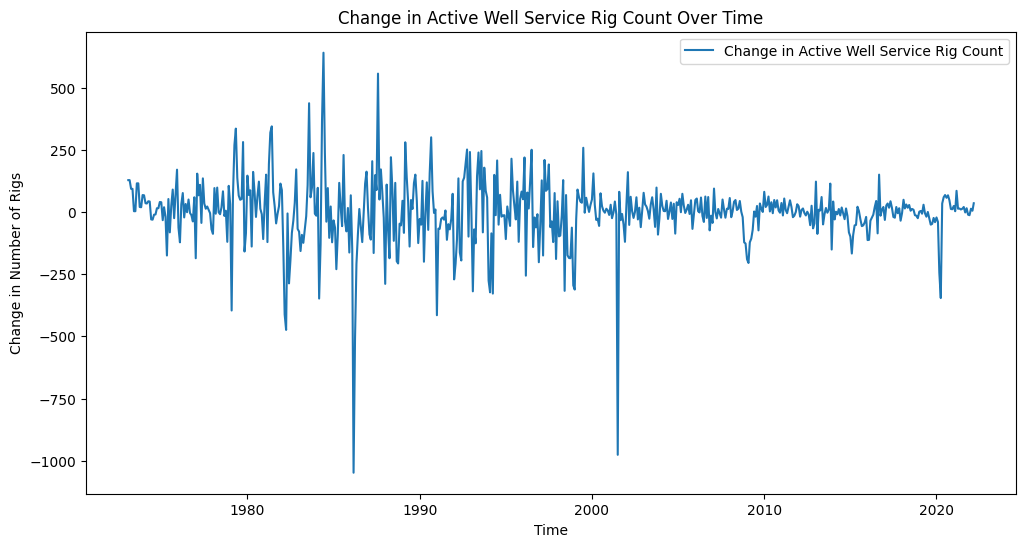

In [31]:
# Compute the first difference of 'Active Well Service Rig Count (Number of Rigs)'
df['Rig Count Change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot the first difference
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Rig Count Change'], label='Change in Active Well Service Rig Count')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.title('Change in Active Well Service Rig Count Over Time')
plt.legend()
plt.show()

There are larger changes prior to 2000. The change in number of rigs are less, after 2000. There remain a few outliers with huge drops but generally, post-2000, the change in number of rigs will fluctuate a lot less than before year 2000. 

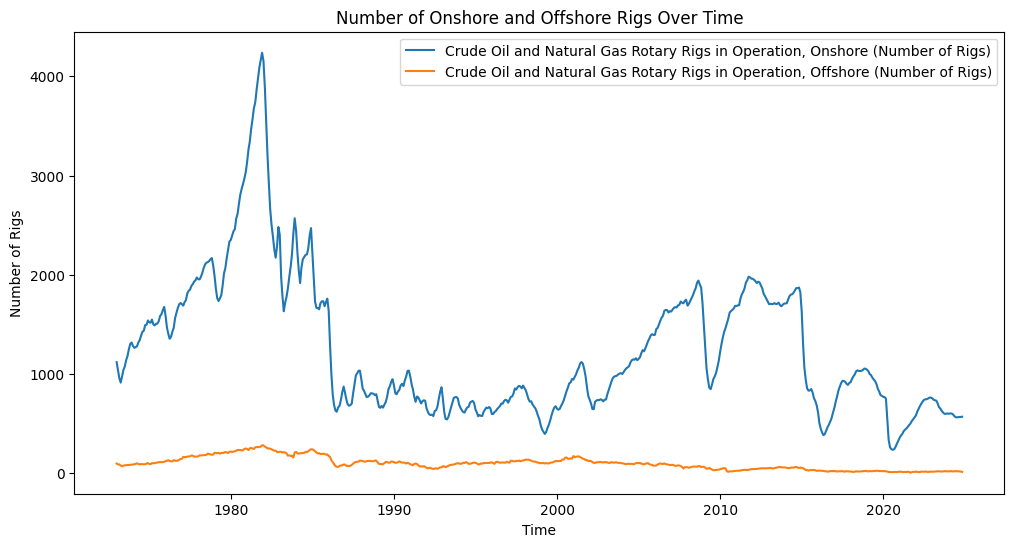

In [32]:
# Melt the first two columns
melted_df = pd.melt(df, id_vars=['time'], value_vars=[
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
], var_name='Rig Type', value_name='Number of Rigs')

# Plot the resulting series
plt.figure(figsize=(12, 6))
for rig_type in melted_df['Rig Type'].unique():
    subset = melted_df[melted_df['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Number of Rigs'], label=rig_type)

plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Number of Onshore and Offshore Rigs Over Time')
plt.legend()
plt.show()